In [ ]:
# https://www.kaggle.com/meaninglesslives/simple-features

In [4]:
import os
import sys
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.transform import resize
from skimage.morphology import label
from skimage.feature import hog
from skimage import exposure
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.feature import canny
from skimage.filters import sobel
from skimage.morphology import watershed
from scipy import ndimage as ndi
import warnings
warnings.filterwarnings("ignore")
from skimage.segmentation import mark_boundaries


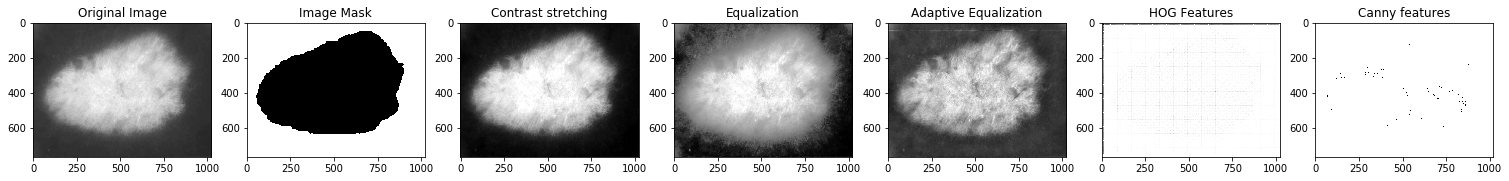

In [5]:
# simple features that can be easily extracted and used for training deep networks
# these features may be used along with original image
ids = os.listdir('data/train/images/')
random.seed(40)
idx = random.randint(0, len(ids))
plt.figure(figsize=(30,15))
plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0)  #adjust this to change vertical and horiz. spacings..
nImg = 3  #no. of images to process
for j, img_name in enumerate(ids[idx:idx+nImg]):
    q = j+1
#     img_name = ids[ind]
    img = load_img('data/train/images/' + img_name, grayscale=True)
    img_mask = load_img('data/train/masks/' + img_name, grayscale=True)
    
    img = np.array(img)
    
#     # Contrast stretching
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    
    # Equalization
    img_eq = exposure.equalize_hist(img)

    # Adaptive Equalization
    img_adapteq = exposure.equalize_adapthist(img)
    
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)
    edge_canny = canny(img)

    img_mask = np.array(img_mask)
    
    plt.subplot(nImg,8,q*8-7)
    plt.imshow(img, cmap='binary')
    plt.title('Original Image')
    
    plt.subplot(nImg,8,q*8-6)
    plt.imshow(img_mask, cmap='binary')
    plt.title('Image Mask')
    
    plt.subplot(nImg,8,q*8-5)    
    plt.imshow(img_rescale, cmap='binary')
    plt.title('Contrast stretching')
    
    plt.subplot(nImg,8,q*8-4)
    plt.imshow(img_eq, cmap='binary')
    plt.title('Equalization')
    
    plt.subplot(nImg,8,q*8-3)
    plt.imshow(img_adapteq, cmap='binary')
    plt.title('Adaptive Equalization')
    
    plt.subplot(nImg,8,q*8-2)
    plt.imshow(hog_image, cmap='binary')
    plt.title('HOG Features')
    
    plt.subplot(nImg,8,q*8-1)
    plt.imshow(edge_canny, cmap='binary')
    plt.title('Canny features')

plt.show()


In [37]:
# This is just for showing the usefullness of some other methods based on edge detection.
# These were mostly used before the advent of deep learning..

img = load_img('data/train/images/' + 'ISIC_0000008' + '.jpg', grayscale=True)
img = np.array(img)
edges = canny(img/255.)
elevation_map = canny(img)
markers = np.zeros_like(img)
markers[img < 100] = 1  #100,,200 are parameters found manually
markers[img > 200] = 2
segmentation = watershed(elevation_map, markers)

Text(0.5,1,'Watershed Segmentation')

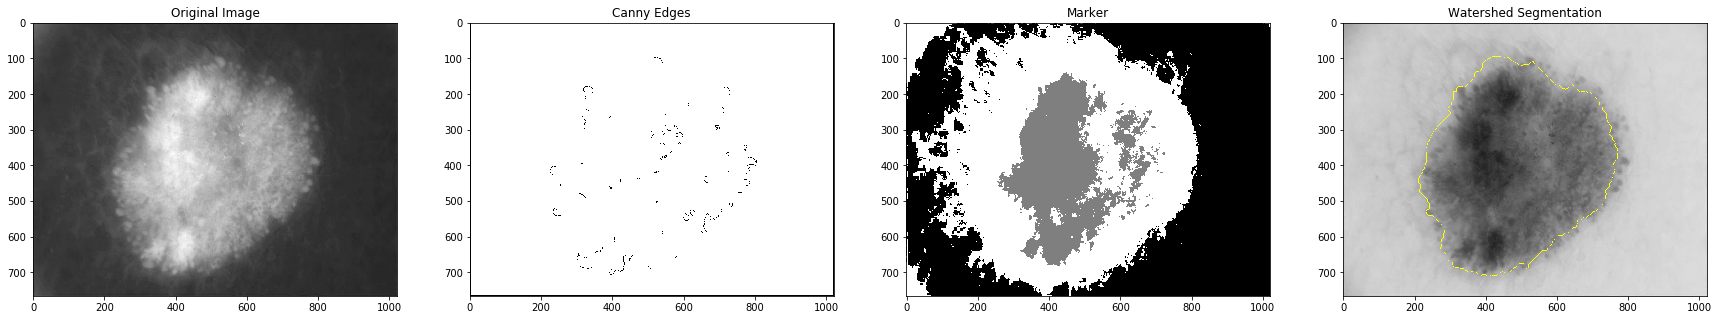

In [38]:
plt.figure(figsize=(30,15))
plt.subplot(1,4,1)
plt.imshow(img, cmap='binary')
plt.title('Original Image')
plt.subplot(1,4,2)
plt.title('Canny Edges')
plt.imshow(edges, cmap='binary')
plt.subplot(1,4,3)
plt.imshow(markers, cmap='binary')
plt.title('Marker')
plt.subplot(1,4,4)
plt.imshow(mark_boundaries(img, segmentation))
plt.title('Watershed Segmentation')